In [45]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from ipynb.fs.full.main_functions import Lasso_regression
import matplotlib.pyplot as plt

In [40]:
data_full = pd.read_csv('B_predittori2.csv')
data_y = pd.read_csv('tfce.csv')
data_y2 = data_full[["Yoon"]]
data_y3 = data_full[["Barton"]]
data_y4 = data_full[["Corr"]]



#define predictor and response variables
X = data_full[["dx/sx", "Cons/prog", "Ind/col", "Flame", "Agreeableness", "Conscientiousness", "Em Stability", "Extroversion", "Openness", "Social Use"]]
X_corr = data_full[["dx/sx", "Cons/prog", "Ind/col", "Flame", "Agreeableness", "Conscientiousness", "Em Stability", "Extroversion", "Openness", "Social Use"]]
y = data_y[["TFCE"]]

#split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/bin/anaconda3/envs/neuro/lib/python3.10/site-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/bin/anaconda3/envs/neuro/lib/python3.10/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/bin/anaconda3/envs/neuro/lib/python3.10/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


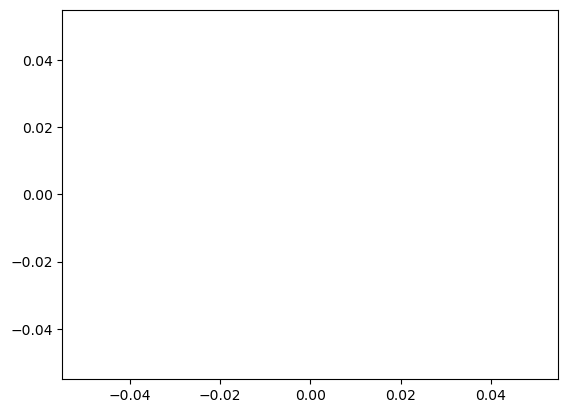

In [50]:
plt.plot(np.corrcoef(data_y2, y))

In [41]:
##call function
r2, root_mean_squared_error, final_coeffs = Lasso_regression(X, y)


Best Score: -0.8138032312784873
Best Hyperparameters: {'alpha': 0.1, 'fit_intercept': False, 'positive': True, 'selection': 'random'}
-0.0006768760699231713
1.0645257764001101
dx/sx                0.000000
Cons/prog            0.000000
Ind/col              0.000000
Flame                0.000000
Agreeableness        0.000000
Conscientiousness    0.000000
Em Stability         0.000000
Extroversion         0.000000
Openness             0.000000
Social Use           0.018474
dtype: float64


In [42]:
r2, root_mean_squared_error, final_coeffs = Lasso_regression(X, data_y2)

Best Score: -0.7713281304577355
Best Hyperparameters: {'alpha': 0.1, 'fit_intercept': False, 'positive': True, 'selection': 'random'}
-0.030213688321735876
1.2566896922302258
dx/sx                0.037381
Cons/prog            0.000000
Ind/col              0.000000
Flame                0.000000
Agreeableness        0.000000
Conscientiousness    0.000000
Em Stability         0.000000
Extroversion         0.000000
Openness             0.000000
Social Use           0.000000
dtype: float64


In [43]:
r2, root_mean_squared_error, final_coeffs = Lasso_regression(X, data_y3)

Best Score: -0.7853779551648252
Best Hyperparameters: {'alpha': 0.09, 'fit_intercept': False, 'positive': False, 'selection': 'random'}
-0.030981933782444626
1.0141391931241537
dx/sx                0.000000
Cons/prog           -0.000000
Ind/col              0.000000
Flame               -0.029296
Agreeableness       -0.045855
Conscientiousness    0.000000
Em Stability         0.000000
Extroversion         0.000000
Openness             0.000000
Social Use          -0.000000
dtype: float64


In [44]:
r2, root_mean_squared_error, final_coeffs = Lasso_regression(X_corr, data_y4)

Best Score: -0.763599314194088
Best Hyperparameters: {'alpha': 0.09, 'fit_intercept': False, 'positive': False, 'selection': 'cyclic'}
-0.02113625270453956
1.102998408464513
dx/sx                0.000000
Cons/prog           -0.044130
Ind/col              0.000000
Flame                0.000000
Agreeableness        0.000000
Conscientiousness   -0.000000
Em Stability        -0.030481
Extroversion        -0.052760
Openness            -0.000000
Social Use           0.000000
dtype: float64


In [ ]:
# Running RFE with the output number of the variable equal to 9
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

lm = LinearRegression()
rfe = RFE(lm, 9)             # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)  

In [ ]:
import statsmodels.api as sm
#you can explicitly change x, x can be changed with number of features
regressor_OLS = sm.OLS(Y, x).fit() 
regressor_OLS.summary()
regressor_OLS.aic #return AIC value
